<a href="https://colab.research.google.com/github/athiniotim/athiniotim/blob/main/fires_vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [4]:
# !python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 82.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
nlp = spacy.load('el_core_news_sm')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
athensvoice_full_articles_df = pd.read_csv('/content/drive/MyDrive/ΕΔΔΕ.2/fires_csv/fire_athens_voice_articles_df.csv')
athensvoice_full_articles_df

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/ellada...,Πυρκαγιά σε εγκαταλελειμμένο κτήριο στο κέντρο...,2025-05-09,05:16:34,Ελλαδα,Newsroom,Πυρκαγιά ξέσπασε το πρωί της Παρασκευής σε εγκ...,Τι αναφέρουν οι πρώτες πληροφορίες,Πυρκαγιά ξέσπασε σε κτήριο στο κέντρο της Αθήν...,https://www.athensvoice.gr/images/1074x600/jpg...
1,https://www.athensvoice.gr/epikairotita/ellada...,Financial Times: Πόλη ευάλωτη στις πυρκαγιές η...,2025-05-06,12:59:14,Ελλαδα,Newsroom,"Την Αθήνα, βάζει στο κάδρο των πόλεων που θέτο...",NaN,Τον κίνδυνο εκδήλωσης πυρκαγιών στην Αθήνα ανα...,https://www.athensvoice.gr/images/1074x600/jpg...
2,https://www.athensvoice.gr/epikairotita/politi...,Πανεπιστήμια: Ποινικές και αστικές συνέπειες γ...,2025-05-03,10:34:00,Πολιτικη & Οικονομια,Newsroom,Τι συζητήθηκε στη σύσκεψη υπό τον πρωθυπουργό ...,Κυρώσεις και στα Ιδρύματα που δεν συμμορφώνοντ...,Ολοκληρώθηκε η άτυπη προπαρασκευαστική σύσκεψη...,https://www.athensvoice.gr/images/1074x600/jpg...
3,https://www.athensvoice.gr/epikairotita/diethn...,Ιερουσαλήμ: Τουλάχιστον 23 τραυματίες από τις ...,2025-04-30,17:20:00,Κοσμος,Newsroom,Ισραήλ: Τουλάχιστον 23 τραυματίες από τις πυρκ...,Μαίνονται εδώ και μέρες,Σε κατάσταση συναγερμού έχουν τεθεί οι ισραηλι...,https://www.athensvoice.gr/images/1074x600/1/j...
4,https://www.athensvoice.gr/epikairotita/diethn...,Λογοκλοπή στην...κουζίνα: Influencer παρουσίαζ...,2025-04-30,15:33:03,Κοσμος,Newsroom,Λογοκλοπή στην...κουζίνα: Influencer παρουσίαζ...,Η υπόθεση μάλλον θα πάρει την δικαστική οδό,Δύο κορυφαίοι συγγραφείς γαστρονομίας κατηγόρη...,https://www.athensvoice.gr/images/1074x600/1/j...
...,...,...,...,...,...,...,...,...,...,...
744,https://www.athensvoice.gr/epikairotita/diethn...,Ουκρανία: Πότε είναι εγκλήματα πολέμου οι ρωσι...,2022-12-17,18:20:59,Κοσμος,Newsroom,Πόλεμος στην Ουκρανία: Πότε οι επιθέσεις σε μη...,"Τι ορίζει το διεθνές δίκαιο, τι αναφέρουν οι ε...",Οι ρωσικές επιθέσεις που στοχεύουν πολιτικές υ...,https://www.athensvoice.gr/images/1074x600/jpg...
745,https://www.athensvoice.gr/epikairotita/diethn...,"Τραγωδία στην Γαλλία: Δέκα νεκροί, μεταξύ των ...",2022-12-16,06:45:00,Κοσμος,Newsroom,"Γαλλία: Δέκα νεκροί, μεταξύ των οποίων 5 παιδι...",Άγνωστα τα αίτια μέχρι στιγμής,Πυρκαγιά που εκδηλώθηκε την περασμένη νύκτα σε...,https://www.athensvoice.gr/images/1074x600/1/j...
746,https://www.athensvoice.gr/epikairotita/ellada...,Πυρκαγιά σε διαμέρισμα στη Θεσσαλονίκη – Δύο ά...,2022-12-12,09:12:49,Ελλαδα,Newsroom,Θεσσαλονίκη: Φωτιά σε διαμέρισμα στην Χαριλάου...,Στην περιοχή της Χαριλάου,Συναγερμός σήμανε στην Πυροσβεστική Υπηρεσία Θ...,https://www.athensvoice.gr/images/1074x600/jpg...
747,https://www.athensvoice.gr/epikairotita/ellada...,Πυρκαγιά σε εργοστάσιο στον Ασπρόπυργο - Μήνυμ...,2022-12-09,06:12:00,Ελλαδα,Newsroom,Ασπρόπυργος: Φωτιά σε εργοστάσιο πολυεστερικών...,Στο σημείο ισχυρές δυνάμεις της Πυροσβεστικής,Σε εξέλιξη βρίσκεται φωτιά σε εργοστάσιο πολυε...,https://www.athensvoice.gr/images/1074x600/1/j...


In [13]:
athensvoice_full_articles_df['text_body'][0]

'Πυρκαγιά ξέσπασε σε κτήριο στο κέντρο της Αθήνας. Σύμφωνα με τις πρώτες πληροφορίες, η πυρκαγιά ξέσπασε τα ξημερώματα της Παρασκευής, 9 Μαΐου 2025, σε εγκαταλελειμμένο κτήριο στη συμβολή των οδών Μενεμάχου και Λιοσίων, στο κέντρο της Αθήνας. Τα αίτια της φωτιάς παραμένουν άγνωστα μέχρι στιγμής. Άμεση ήταν η κινητοποίηση της Πυροσβεστικής Υπηρεσίας, με εννέα πυροσβέστες και τρία οχήματα να επιχειρούν στο σημείο. Η πυρκαγιά κατασβέστηκε χωρίς να αναφερθούν τραυματισμοί ή σημαντικές ζημιές σε παρακείμενα κτήρια.'

θα χρησιμοποιήσουμε τα παραπάνω άρθρα που μαζέψαμε από την efsyn

In [8]:
athensvoice_full_articles_df.head(1)

,article_url,title,date,time,section,author,excerpt,subtitle,text_body,feat_img_link
0,https://www.athensvoice.gr/epikairotita/ellada...,Πυρκαγιά σε εγκαταλελειμμένο κτήριο στο κέντρο...,2025-05-09,05:16:34,Ελλαδα,Newsroom,Πυρκαγιά ξέσπασε το πρωί της Παρασκευής σε εγκ...,Τι αναφέρουν οι πρώτες πληροφορίες,Πυρκαγιά ξέσπασε σε κτήριο στο κέντρο της Αθήν...,https://www.athensvoice.gr/images/1074x600/jpg...


In [9]:
athensvoice_full_articles_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
subtitle,object
text_body,object
feat_img_link,object


In [10]:
athensvoice_full_articles_df.loc[0, 'date']

'2025-05-09'

In [11]:
athensvoice_full_articles_df['date_dt'] = pd.to_datetime(athensvoice_full_articles_df['date'], format='%Y-%m-%d')

In [17]:
athensvoice_full_articles_df['time_dt'] = pd.to_datetime(athensvoice_full_articles_df['time'], format='%H:%M:%S')

In [20]:
athensvoice_full_articles_df['datetime'] = pd.to_datetime(
    athensvoice_full_articles_df['date'] + ' ' + athensvoice_full_articles_df['time'],
    format='%Y-%m-%d %H:%M:%S')

In [21]:
athensvoice_full_articles_df.dtypes

,0
article_url,object
title,object
date,object
time,object
section,object
author,object
excerpt,object
subtitle,object
text_body,object
feat_img_link,object


In [26]:
athensvoice_full_articles_df['full_text'] = (
    athensvoice_full_articles_df['title'].fillna('') + ' .' +
    athensvoice_full_articles_df['subtitle'].fillna('') + ' .' +
    athensvoice_full_articles_df['excerpt'].fillna('') + ' .' +
    athensvoice_full_articles_df['text_body'].fillna('.')
).str.strip()

In [27]:
short_athensvoice_df = athensvoice_full_articles_df[['datetime','full_text']]
short_athensvoice_df = short_athensvoice_df.reset_index(drop=True)
short_athensvoice_df.head(1)

,datetime,full_text
0,2025-05-09 05:16:34,Πυρκαγιά σε εγκαταλελειμμένο κτήριο στο κέντρο...


In [28]:
short_athensvoice_df['year'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).year
short_athensvoice_df['month'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).month
short_athensvoice_df['day'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).day
short_athensvoice_df['hour'] = pd.DatetimeIndex(short_athensvoice_df['datetime']).hour

In [29]:
short_athensvoice_df.head()

,datetime,full_text,year,month,day,hour
0,2025-05-09 05:16:34,Πυρκαγιά σε εγκαταλελειμμένο κτήριο στο κέντρο...,2025.0,5.0,9.0,5.0
1,2025-05-06 12:59:14,Financial Times: Πόλη ευάλωτη στις πυρκαγιές η...,2025.0,5.0,6.0,12.0
2,2025-05-03 10:34:00,Πανεπιστήμια: Ποινικές και αστικές συνέπειες γ...,2025.0,5.0,3.0,10.0
3,2025-04-30 17:20:00,Ιερουσαλήμ: Τουλάχιστον 23 τραυματίες από τις ...,2025.0,4.0,30.0,17.0
4,2025-04-30 15:33:03,Λογοκλοπή στην...κουζίνα: Influencer παρουσίαζ...,2025.0,4.0,30.0,15.0


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# διανυσματοποίηση = μετατροπή κειμένων σε μια σειρά από αριθμούς

In [31]:
cv = CountVectorizer()  #πάντα αυτό

In [75]:
short_athensvoice_df.head(5)

,datetime,full_text,year,month,day,hour
0,2025-05-09 05:16:34,Πυρκαγιά σε εγκαταλελειμμένο κτήριο στο κέντρο...,2025.0,5.0,9.0,5.0
1,2025-05-06 12:59:14,Financial Times: Πόλη ευάλωτη στις πυρκαγιές η...,2025.0,5.0,6.0,12.0
2,2025-05-03 10:34:00,Πανεπιστήμια: Ποινικές και αστικές συνέπειες γ...,2025.0,5.0,3.0,10.0
3,2025-04-30 17:20:00,Ιερουσαλήμ: Τουλάχιστον 23 τραυματίες από τις ...,2025.0,4.0,30.0,17.0
4,2025-04-30 15:33:03,Λογοκλοπή στην...κουζίνα: Influencer παρουσίαζ...,2025.0,4.0,30.0,15.0


In [76]:
short_athensvoice_df.shape

(749, 6)

In [101]:
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])  #πάρε αυτά τα κείμενα από αυτή τη στήλη και διανυσματοποίησέ τα

In [102]:
count_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3942 stored elements and shape (749, 20)>

In [103]:
count_vector.shape

(749, 20)

In [104]:
BoW = cv.get_feature_names_out()  #δίνει τις μοναδικές λέξεις
list(BoW)[22000:22010]

[]

In [105]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,civilprotection gov,gov gr,pic twitter,twitter com,γενική γραμματεία,γενικής γραμματείας,γραμματεία πολιτικής,γραμματείας πολιτικής,δασικών πυρκαγιών,κίνδυνος πυρκαγιάς,κατηγορία κινδύνου,κινδύνου πυρκαγιάς,κλιματικής κρίσης,κρίσης πολιτικής,πολιτικής προστασίας,προστασίας civilprotection,πρόβλεψης κινδύνου,πυροσβεστική υπηρεσία,υπουργείου κλιματικής,υψηλός κίνδυνος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [107]:
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])

In [108]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,0000,00002,000euro,002,007,00h2slmvkqℹ,01,02,...,أمن,الإسماعيلية,تخفي,للنيران,مبنى,مديرية,مرعبة,مشاهد,ملامح,⁰multiple
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents".

The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

**min_df** is used for removing terms that appear too infrequently. For example:

    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    min_df = 5 means "ignore terms that appear in less than 5 documents".

The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

[Πηγή](https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer)

In [109]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01)

In [110]:
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])

In [111]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,02,03,04,06,07,08,09,...,όφελος,όχημα,ύλη,ύλης,ύπαιθρο,ύφεση,ύψος,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
results = results.loc[:, results.columns.str.contains(r'[a-zA-Zα-ωΑ-Ω]', regex=True)]
results.head()

,1η,24ωρα,24ωρο,2ο,afp,after,all,and,are,as,...,όφελος,όχημα,ύλη,ύλης,ύπαιθρο,ύφεση,ύψος,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [114]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,gr,γενική,γραμματεία,κίνδυνος,κινδύνου,κλιματικής,περιοχές,περιοχή,πολίτες,πολιτικής,προστασίας,πυρκαγιά,πυρκαγιάς,πυρκαγιές,πυρκαγιών,πυροσβεστική,σήμερα,σύμφωνα,υψηλός,φωτιά
0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0
1,0,0,0,4,0,1,7,11,0,0,0,10,4,14,5,0,0,4,0,9
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,2,0,0,0,2,0,5,1,2,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκλιμ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,κλιμάκια,κλιμάκιο,κλιμάκωση,κλιμάκωσης,κλιμακίου,κλιμακοστασίου,κλιμακοφόρο,κλιμακώνουν,κλιμακώσει,κλιματικά,κλιματικές,κλιματική,κλιματικής,κλιματικού,κλιματικών,κλιματισμού,κλιματιστικά,κλιματολογίας,κλιματολογικές,κλιματολόγος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\b[α-ωά-ώ]*κυβ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results2.head()

,αντικυβερνητικές,διακυβέρνησής,διακυβέρνησης,κυβέρνησή,κυβέρνηση,κυβέρνησης,κυβερνήσεις,κυβερνήτη,κυβερνήτης,κυβερνητικά,κυβερνητικές,κυβερνητική,κυβερνητικής,κυβερνητικού,κυβερνητικούς,κυβερνητικό,κυβερνητικός,κυβερνητικών,κυβερνώντες,κυβερνώντος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,civilprotection gov,gov gr,pic twitter,twitter com,γενική γραμματεία,γενικής γραμματείας,γραμματεία πολιτικής,γραμματείας πολιτικής,δασικών πυρκαγιών,κίνδυνος πυρκαγιάς,κατηγορία κινδύνου,κινδύνου πυρκαγιάς,κλιματικής κρίσης,κρίσης πολιτικής,πολιτικής προστασίας,προστασίας civilprotection,πρόβλεψης κινδύνου,πυροσβεστική υπηρεσία,υπουργείου κλιματικής,υψηλός κίνδυνος
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
results.sum(axis = 0).sort_values(ascending = False)

,0
πολιτικής προστασίας,1518
υψηλός κίνδυνος,673
κίνδυνος πυρκαγιάς,615
γενική γραμματεία,536
γραμματεία πολιτικής,535
gov gr,430
κλιματικής κρίσης,417
civilprotection gov,412
κρίσης πολιτικής,402
υπουργείου κλιματικής,338


In [119]:
sum_words =  results.sum(axis = 0)
sum_words.sort_values(ascending = False).head()

,0
πολιτικής προστασίας,1518
υψηλός κίνδυνος,673
κίνδυνος πυρκαγιάς,615
γενική γραμματεία,536
γραμματεία πολιτικής,535


In [120]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words),
                     vocabulary = ['ευθύνη', 'υψηλός κίνδυνος', 'πολιτικής προστασίας', 'κλιματική κρίση'])
count_vector = cv.fit_transform(short_athensvoice_df['full_text'])
chozen_results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
chozen_results

,ευθύνη,υψηλός κίνδυνος,πολιτικής προστασίας,κλιματική κρίση
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
744,0,0,0,0
745,0,0,0,0
746,0,0,0,0
747,0,0,0,0


In [122]:
results.sort_values(by='πολιτικής προστασίας', ascending=False).head()

,civilprotection gov,gov gr,pic twitter,twitter com,γενική γραμματεία,γενικής γραμματείας,γραμματεία πολιτικής,γραμματείας πολιτικής,δασικών πυρκαγιών,κίνδυνος πυρκαγιάς,κατηγορία κινδύνου,κινδύνου πυρκαγιάς,κλιματικής κρίσης,κρίσης πολιτικής,πολιτικής προστασίας,προστασίας civilprotection,πρόβλεψης κινδύνου,πυροσβεστική υπηρεσία,υπουργείου κλιματικής,υψηλός κίνδυνος
239,3,3,1,1,3,3,3,3,3,4,2,2,3,3,12,3,2,1,3,5
313,4,4,1,1,4,3,4,3,1,4,1,2,3,3,11,3,3,2,3,4
316,4,4,0,0,4,3,4,3,1,4,1,2,3,3,11,3,2,2,3,2
315,4,4,1,1,4,3,4,3,1,4,1,2,3,3,11,3,3,2,3,4
318,4,4,0,0,4,3,4,3,1,4,1,2,3,3,11,3,2,2,3,2


In [123]:
short_athensvoice_df['full_text'].loc[239]

'Πολύ υψηλός κίνδυνος πυρκαγιάς σήμερα (15.7) σε επτά περιφέρειες της χώρας Ο χάρτης της Γενικής Γραμματείας Πολιτικής Προστασίας Κίνδυνος πυρκαγιάς: Πολύ υψηλός σήμερα (15.7) σε επτά περιφέρειες -\xa0Ο χάρτης της Γενικής Γραμματείας Πολιτικής Προστασίας Πολύ υψηλός κίνδυνος πυρκαγιάς (κατηγορία κινδύνου 4)\xa0προβλέπεται σήμερα, Δευτέρα 15 Ιουλίου στις περιφέρειες Αττικής και Κρήτης καθώς και σε περιοχές της Πελοποννήσου, της Στερεάς Ελλάδας, του Βορείου Αιγαίου, της Ανατολικής Μακεδονίας και Θράκης, σύμφωνα με το\xa0Χάρτη Πρόβλεψης Κινδύνου Πυρκαγιάς\xa0που εκδίδει η\xa0Γενική Γραμματεία Πολιτικής Προστασίας\xa0του\xa0υπουργείου Κλιματικής Κρίσης και Πολιτικής Προστασίας\xa0(civilprotection.gov.gr). Συγκεκριμένα \xa0πολύ υψηλός κίνδυνος πυρκαγιάς (κατηγορία κινδύνου 4)\xa0προβλέπεται σήμερα για τις εξής περιοχές: • Περιφέρεια Κρήτης • Περιφέρεια Αττικής • Περιφέρεια Πελοποννήσου (ΠΕ Κορινθίας, ΠΕ Αργολίδας) • Περιφέρεια Στερεάς Ελλάδας (ΠΕ Βοιωτίας, ΠΕ Εύβοιας) • Περιφέρεια Ανατολική

In [124]:
athensvoice_full_articles_df['title'].loc[239]

'Πολύ υψηλός κίνδυνος πυρκαγιάς σήμερα (15.7) σε επτά περιφέρειες της χώρας'

Τώρα αν θέλω μπορώ να κοιτάξω τι διγράμματα υπάρχουν σ' συτό άρθρο

In [125]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_athensvoice_df.iloc[[239]]['full_text'])
results239 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words239 =  results239.sum(axis =0)
sum_words239.sort_values(ascending = False).head()

,0
πολιτικής προστασίας,12
υψηλός κίνδυνος,5
υψηλών θερμοκρασιών,4
ιδιαίτερα προσεκτικοί,4
κίνδυνος πυρκαγιάς,4


### **TfidfVectorizer**

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_athensvoice_df['full_text'])

In [129]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,00,000,10,100,11,112,12,13,14,15,...,χώρα,χώρας,χώρες,χώρο,χώρους,ψησταριών,ύπαιθρο,ύψος,ώρα,ώρες
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.049969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029411,...,0.024515,0.0,0.0,0.0,0.034313,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.068551,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.190351


### **Cosine similarity (ομοιότητα κειμένων)**

In [130]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==> 
[[1.00000000e+00 2.06706994e-01 4.88810525e-03 3.72847568e-02
  0.00000000e+00 3.38633550e-03 1.14516943e-02 3.69501551e-01
  1.06670233e-01 1.98489809e-01 2.07135354e-01 0.00000000e+00
  1.22613962e-01 1.07421473e-01 8.61849871e-02 0.00000000e+00
  2.02989230e-03 6.81095040e-03 2.10693383e-01 6.59182464e-02
  2.71508697e-02 2.16742617e-01 4.48338786e-02 9.14624678e-02
  0.00000000e+00 9.63712427e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.11010729e-02 5.98132024e-02
  0.00000000e+00 6.07168600e-02 2.42062216e-01 1.70330242e-01
  7.38352692e-02 1.40423643e-01 2.29590734e-01 2.32628356e-01
  0.00000000e+00 1.40159799e-01 9.30627056e-02 2.01674588e-01
  8.90331875e-02 0.00000000e+00 1.23771988e-01 0.00000000e+00
  9.46599515e-02 3.14985114e-03 4.59730372e-02 0.00000000e+00
  1.02466402e-01 6.71250570e-02 6.19938808e-02 0.00000000e+00
  0.00000000e+00 1.76459294e-01 1.43910955e-01 2.31854652e-01
  1.40799099e-01 0.00000000e+00 0.00000000e+00 2.49

In [131]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [132]:
len(arr)

749

Ας δούμε ποια άρθρα μοιάζουν περισσότερο με το 1ο

<Axes: >

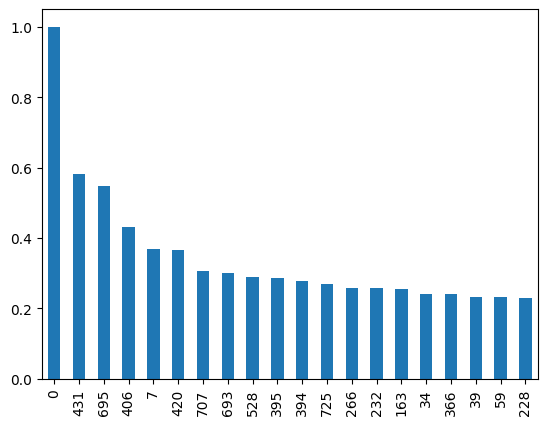

In [133]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [134]:
short_athensvoice_df['full_text'].loc[0]

'Πυρκαγιά σε εγκαταλελειμμένο κτήριο στο κέντρο της Αθήνας Τι αναφέρουν οι πρώτες πληροφορίες Πυρκαγιά ξέσπασε το πρωί της Παρασκευής σε εγκαταλελειμμένο κτήριο στο κέντρο της Αθήνας Πυρκαγιά ξέσπασε σε κτήριο στο κέντρο της Αθήνας. Σύμφωνα με τις πρώτες πληροφορίες, η πυρκαγιά ξέσπασε τα ξημερώματα της Παρασκευής, 9 Μαΐου 2025, σε εγκαταλελειμμένο κτήριο στη συμβολή των οδών Μενεμάχου και Λιοσίων, στο κέντρο της Αθήνας. Τα αίτια της φωτιάς παραμένουν άγνωστα μέχρι στιγμής. Άμεση ήταν η κινητοποίηση της Πυροσβεστικής Υπηρεσίας, με εννέα πυροσβέστες και τρία οχήματα να επιχειρούν στο σημείο. Η πυρκαγιά κατασβέστηκε χωρίς να αναφερθούν τραυματισμοί ή σημαντικές ζημιές σε παρακείμενα κτήρια.'

In [136]:
short_athensvoice_df['full_text'].loc[431]

'Πυρκαγιά σε διαμέρισμα στο κέντρο της Αθήνας Αναφορές για εγκλωβισμένο Πυρκαγιά σε διαμέρισμα στο κέντρο της Αθήνας - Αναφορές για εγκλωβισμένο Πυρκαγιά εκδηλώθηκε το πρωί της Τετάρτης 27 Δεκεμβρίου\xa0σε διαμέρισμα πρώτου ορόφου πολυκατοικίας στη συμβολή των οδών Κεραμεικού και Καλλέργη στο κέντρο της Αθήνας. Σύμφωνα με πληροφορίες από την Πυροσβεστική, απεγκλωβίστηκαν άμεσα δύο άτομα που βρίσκονταν μέσα στο διαμέρισμα. Στην περιοχή επιχειρούν 12 πυροσβέστες με 4 οχήματα. #Πυρκαγιά σε διαμέρισμα, επί της οδού Κεραμεικού, στο δήμο της Αθήνας. Επιχειρούν 12 #πυροσβέστες με 4 οχήματα.'

<Axes: >

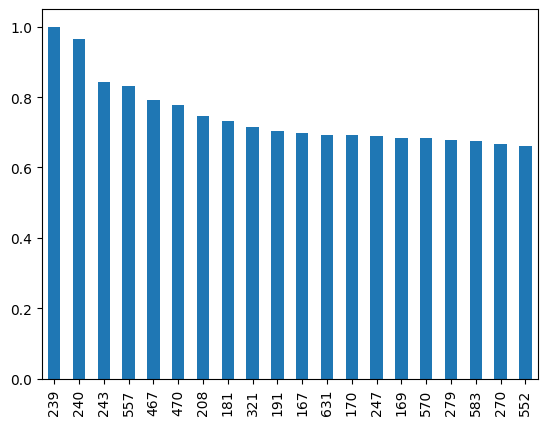

In [137]:
pd.DataFrame(arr).loc[239].sort_values(ascending = False).head(20).plot(kind = 'bar')

<Axes: >

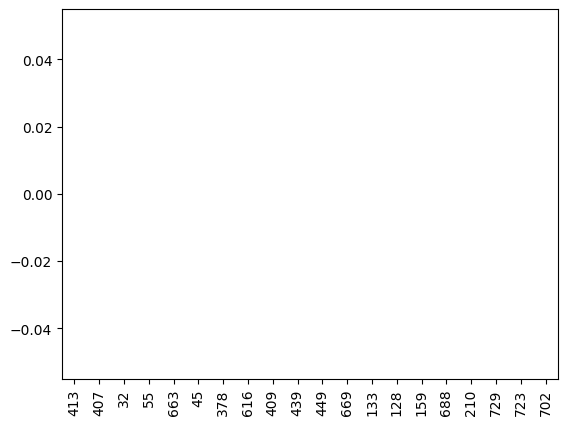

In [138]:
pd.DataFrame(arr).loc[239].sort_values(ascending = False).tail(20).plot(kind = 'bar')

In [139]:
short_athensvoice_df['full_text'].loc[239]

'Πολύ υψηλός κίνδυνος πυρκαγιάς σήμερα (15.7) σε επτά περιφέρειες της χώρας Ο χάρτης της Γενικής Γραμματείας Πολιτικής Προστασίας Κίνδυνος πυρκαγιάς: Πολύ υψηλός σήμερα (15.7) σε επτά περιφέρειες -\xa0Ο χάρτης της Γενικής Γραμματείας Πολιτικής Προστασίας Πολύ υψηλός κίνδυνος πυρκαγιάς (κατηγορία κινδύνου 4)\xa0προβλέπεται σήμερα, Δευτέρα 15 Ιουλίου στις περιφέρειες Αττικής και Κρήτης καθώς και σε περιοχές της Πελοποννήσου, της Στερεάς Ελλάδας, του Βορείου Αιγαίου, της Ανατολικής Μακεδονίας και Θράκης, σύμφωνα με το\xa0Χάρτη Πρόβλεψης Κινδύνου Πυρκαγιάς\xa0που εκδίδει η\xa0Γενική Γραμματεία Πολιτικής Προστασίας\xa0του\xa0υπουργείου Κλιματικής Κρίσης και Πολιτικής Προστασίας\xa0(civilprotection.gov.gr). Συγκεκριμένα \xa0πολύ υψηλός κίνδυνος πυρκαγιάς (κατηγορία κινδύνου 4)\xa0προβλέπεται σήμερα για τις εξής περιοχές: • Περιφέρεια Κρήτης • Περιφέρεια Αττικής • Περιφέρεια Πελοποννήσου (ΠΕ Κορινθίας, ΠΕ Αργολίδας) • Περιφέρεια Στερεάς Ελλάδας (ΠΕ Βοιωτίας, ΠΕ Εύβοιας) • Περιφέρεια Ανατολική

In [140]:
short_athensvoice_df['full_text'].loc[240]

'Πολύ υψηλός κίνδυνος πυρκαγιάς αύριο σε επτά περιφέρειες της χώρας Συστάσεις της ΓΓΠΠ λόγω των πολύ υψηλών θερμοκρασιών Πολιτική Προστασία: Πολύ υψηλός κίνδυνος πυρκαγιάς αύριο σε επτά περιφέρειες Πολύ υψηλός κίνδυνος πυρκαγιάς (κατηγορία κινδύνου 4)\xa0προβλέπεται αύριο, στις περιφέρειες Αττικής και Κρήτης καθώς και σε περιοχές της Πελοποννήσου, της Στερεάς Ελλάδας, του Βορείου Αιγαίου, της Ανατολικής Μακεδονίας και Θράκης, σύμφωνα με το\xa0Χάρτη Πρόβλεψης Κινδύνου Πυρκαγιάς\xa0που εκδίδει η\xa0Γενική Γραμματεία Πολιτικής Προστασίας\xa0του\xa0υπουργείου Κλιματικής Κρίσης και Πολιτικής Προστασίας\xa0(civilprotection.gov.gr). Συγκεκριμένα \xa0πολύ υψηλός κίνδυνος πυρκαγιάς (κατηγορία κινδύνου 4)\xa0προβλέπεται αύριο για τις εξής περιοχές: • Περιφέρεια Κρήτης • Περιφέρεια Αττικής • Περιφέρεια Πελοποννήσου (ΠΕ Κορινθίας, ΠΕ Αργολίδας) • Περιφέρεια Στερεάς Ελλάδας (ΠΕ Βοιωτίας, ΠΕ Εύβοιας) • Περιφέρεια Ανατολικής Μακεδονίας & Θράκης (ΠΕ Έβρου, ΠΕ Ροδόπης) • Περιφέρεια Βορείου Αιγαίου (ΠΕ 

In [141]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

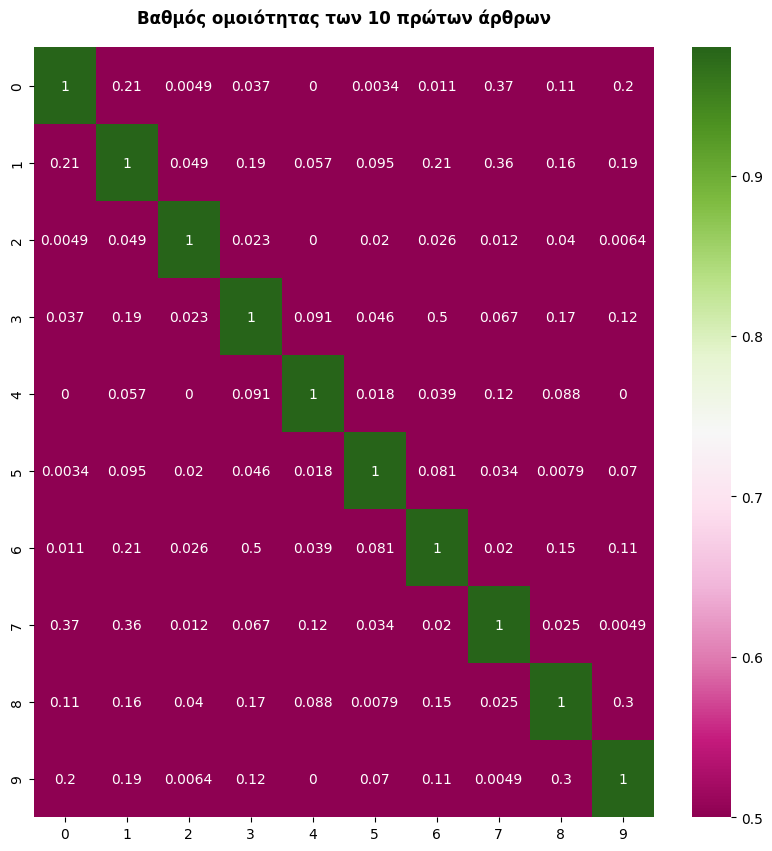

In [143]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')

sns.heatmap(data=arr, annot=True, vmin=0.50, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

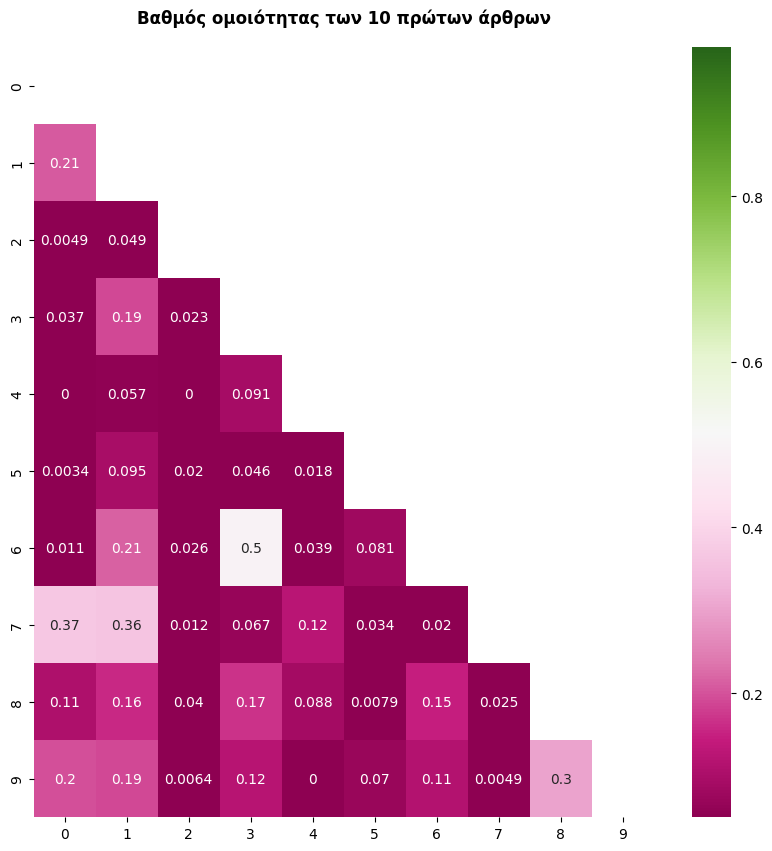

In [144]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<το path και το όνομα του αρχείου>.png')

Όπως λέτε και στην εκφώνηση της άσκησης καταγράφω τις δυσκολίες μου (συνολικά από το scraping, βάσει όσων παρατηρώ από εδώ):

1. Έχω σκράπαρει άσχετα άρθρα (δε ξέρω γιατί υπήρχαν στη σελίδα αναζήτησης με τη λέξη πυρκαγιά που αναζήτησα και δε ξέρω πως να τα καθαρίσω μαζικά για να τα αποθηκεύσω σε ένα νέο df, γιατί δε ξέρω σε τι αφορούν όλα αυτά να τα προσθέσω στα stopwords έστω)
2. Ανάμεσα στις συχνότερες λέξεις είναι ο όρος αναζήτησης (εν προκειμένω πυρκαγιά/ες/ως, κλπ.), πρέπει πάντα να τον προσθέτω στα stopwords?
3. θα ηθελα αν μπορειτε να μας δωσετε τον κωδικα που χρησιμοποιησατε στο προηγουμενο μαθημα που οταν χωριζει τα κειμενα για να αφαιρεθούν τα \n\t, κλπ., καθώς εντοπίζω ακρετά τέτοια στα texts μου (πχ. \xa0) και θελω να τα αφαιρέσω συνολικά στα csv αλλά δε τα καταφέρνω και δε ξέρω γιατί, τί κάνω λάθος)
4. Απορία: πως γίνεται να εμφανίζει αραβικούς χαρρακτήρες; (αυτούς εννοώ - αν ειναι αραβικοί:\ : أمن	الإسماعيلية	تخفي	للنيران	مبنى	مديرية	مرعبة	مشاهد	ملامح)
5. Άσχετο αλλά: όταν δοκίμασα να σκραπάρω άρθρα με τον scraper της καθημερινής, ενώ οι σελίδες για το χρονικό πλαίσιο που θα εξετάσω ήταν από την 1 έως την 195, μετά την 177 εμφάνιζε error (soup = None και δεν εκανε scrape) και έτσι έφτιαξα έναν άλλο scraper με τη βοήθεια του ai βοηθού της colab φυσικά και πήρα έτσι τα δεδομένα από την 177 εως την 193. Ερώτηση σχετική: εγώ για την τελική υποβολή πρέπει να έχω και τους 2 scraper για την καθημερινή σε ένα notebook?
6. Ερώτηση για την τελική υποβολή: Ένας φάκελος με όλους τους scraper (διαφορετικούς για κάθε σελίδα που χρησιμοποιήσα) είναι οκ;
7. Είναι υποχρεωτικό να χρησιμοποιήσουμε όλες τις τεχνικές σε όλες τις σελίδες πχ να κάνουμε wordclouds για όλες τις σελίδες που σκραπάρουμε ή μπορούμε να κρατήσουμε ως κεντρική τη δική μας και να τη συγκρίνουμε με τις άλλες με διαφορετικούς τρόπους πχ wordclouds --> athens voice(δική μου) & kathimerini, vectorization --> athensvoice & newsbomb